# N-D Linear Regression

Get the data [here](https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/mlr/frames/frame.html)

The data represents: Test Scores for General Psychology

The data (X1, X2, X3, X4) are for each student.

* X1 = score on exam #1

* X2 = score on exam #2

* X3 = score on exam #3

* X4 = score on final exam

We will be holding X4 as our y value

## Process

* Loading the data
* Exploring the data
* Normalizing the data
* Adding bias to our input 
* Computing the cost function $J(\theta)$
* Implementing Gradient Descent
* Training your model
* Making a Prediction
* Determine how well the model performed

## Equations
The objective of linear regression is to minimize the cost function

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2$$

where $m$ is the number of training examples,

$y^{(i)}$ is the label or output value from the dataset for a specific row which is determined by the index $i$,

$x^{(i)}$ is a specific row of the feature matrix which is determined once again by the index $i$,

$h_\theta(x)$ is the hypothesis which is given by the linear model

$$ h_\theta(x) = \theta^T x = \theta_0x_0 + \theta_1 x_1$$

where $\theta$ is a column vector of weights, i.e.,
$$ \theta = \begin{bmatrix} \theta_0 \\ \theta_1 \\ \theta_2 \\ \vdots \\ \theta_n \end{bmatrix} $$

These weights are estimated using the gradient descent algorithm specifically the batch gradient descent algorithm which is a procedure of simultaneously updating the values of $\theta_j$, i.e.,

$$ \theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x_j^{(i)} $$ 

where $j = 0, 1, ..., n$ represents the feature index number with $n$ representing the number of features,

$\alpha$ represents the learning rate,

$x_j^{(i)}$ represents a value in the feature matrix for a specific row which is determined by the index $i$ and the value in the specified row is determined by the feature index $j$, and

$:=$ means to assign the value computed on the right-hand side to the variable on the left-hand side.

Note (1): As long as the learning rate $\alpha$ is not too large with each step of gradient descent, the weights $\theta_j$ will become closer to the optimal values that will achieve the lowest cost $J(\theta)$.

If $\alpha$ is too large this can cause gradient descent to diverge which means a local minimum or global minimum will not be found, and the smaller $\alpha$ is the longer it will take gradient descent to find the minimum.

So, you can think of alpha as the size of the step that is being taken with each iteration.

In [20]:
%matplotlib inline

import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

## Loading the Data

In [21]:
# pip install xlrd
df = pd.read_excel('data/mlr03.xls');

*** No CODEPAGE record, no encoding_override: will use 'ascii'


In [22]:
X = df.values
n = len(X[1]) -1
m = len(X)
print("Shape of data", X.shape)
print("Number of features", n)
print("Number of samples", m)

Shape of data (25, 4)
Number of features 3
Number of samples 25


## Exploring the data

You can use the head function to get the first 5 entries in a data frame

In [23]:
df.head()

,EXAM1,EXAM2,EXAM3,FINAL
0,73,80,75,152
1,93,88,93,185
2,89,91,90,180
3,96,98,100,196
4,73,66,70,142


### Is our data linear?

we can show a simple 2D plot for each of our features to get a general idea if our features have a linear relationship to our output

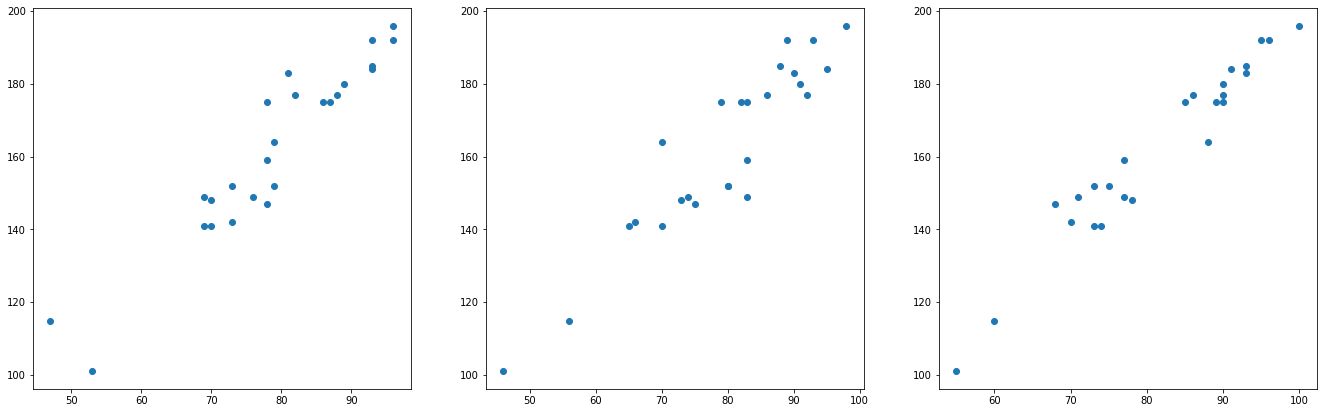

In [24]:
fig, axarr = plt.subplots(1, 3, figsize=(23, 7))

# set index to loop through plots
i = 0


for i in range(3):
    axarr[i].scatter(X[:, i], X[:, 3])

Our data seems to be pretty linear so Linear Regression seems like a good option

### Visualizing the shape of our data

X is a feature matrix that is m x n where:

* m = number of samples
* n = number of features

y is our ouput vector that is m x 1

In [25]:
# .values will transform the dataframe into a more familiar numpy array
# We can get our data into a numpy array by getting the columns by their keys
# Also we'll add our bias here as well
y = df['FINAL'].values
X = df[['EXAM1', 'EXAM2', 'EXAM3']].values

## Normalize features

In [26]:
def normalize(X):

    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma
    
    return mu, sigma, X_norm

In [27]:
mu, sigma, X = normalize(X)
print("Mean", mu)
print("Standard deviation", sigma)
print("Normalized X matrix sample", X[0])

Mean [79.04 79.48 81.48]
Standard deviation [12.0315585  12.25110607 11.52777515]
Normalized X matrix sample [-0.5020131   0.04244515 -0.56212061]


## Add bias to input

In [28]:
X = np.concatenate([np.ones((m, 1)), X], axis=1)
print("Normalized X with bias", X[0])

Normalized X with bias [ 1.         -0.5020131   0.04244515 -0.56212061]


## Computing the cost function $J(\theta)$

In [29]:
# function to compute cost

def computeCost(X, y, theta):
    
    # get number of samples
    m = y.shape[0]
    
    # compute hypothesis
    h = X@theta
    
    # Compute cost
    J = 1/(2*m)*sum((h-y)**2)
    
    return J

## Implementing Gradient Descent

In [30]:
# function for getting gradient descent

def gradientDescent(X, y, theta, alpha, num_iters):
    
    # get number of samples
    m = y.shape[0]
    
    # get a copy of theta, which will be updated by gradient descent
    theta = theta.copy()
    
    J_history = []
    
    for i in range(num_iters):
        
        h = X@theta
        
        theta = theta - alpha * (1/m) * (h-y)@X
        
        # save the cost on every iteration
        J_history.append(computeCost(X, y, theta))
    
    return theta, J_history

In [31]:
print("The shape of X is", X.shape)
print("The shape of y is", y.shape)
print("Example feature vector", X[0])

The shape of X is (25, 4)
The shape of y is (25,)
Example feature vector [ 1.         -0.5020131   0.04244515 -0.56212061]


## Training your model

theta computed from gradient descent: [162.0399998    4.94883267   6.43114652  12.99386812]
theta computed from gradient descent: [ 9.61452943e+83 -1.48297673e+99 -1.45766243e+99 -1.45275857e+99]


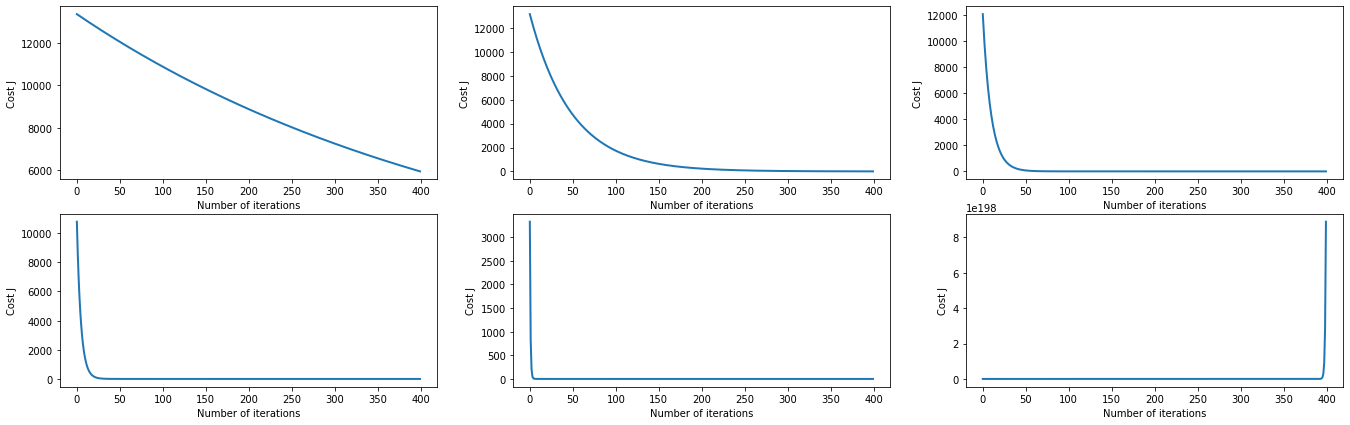

In [32]:
fig, axarr = plt.subplots(2, 3, figsize=(23, 7))

num_iters = 400

alpha_list = [.001, .01, .05, .1, .5, 1]

idx = 0

for i in range(2):
    for j in range(3):

        theta = np.zeros(4)
        theta, J_history = gradientDescent(X, y, theta, alpha_list[idx], num_iters)

        axarr[i,j].plot(np.arange(len(J_history)), J_history, lw=2)
        axarr[i,j].set_xlabel('Number of iterations')
        axarr[i,j].set_ylabel('Cost J')
        idx += 1

    print('theta computed from gradient descent: {:s}'.format(str(theta)))

## Making a Prediction

In [33]:
# compute theta
alpha = .6
num_iters = 500

theta = np.zeros(4)

theta, J_history = gradientDescent(X, y, theta, alpha, num_iters)


# input features
input_vec = [70, 90, 95]

# normalize
mu, sigma, input_vec = normalize(input_vec)
    
# Recall that the first column of X is all-ones. 
# Thus, it does not need to be normalized.
# add bias
input_vec_bias = np.append(1, input_vec)

print("input vector", input_vec)
print("input vector with bias", input_vec_bias)
print("theta", theta)

final = input_vec_bias@theta


print('Final Exam Score', final)


input vector [-1.38873015  0.46291005  0.9258201 ]
input vector with bias [ 1.         -1.38873015  0.46291005  0.9258201 ]
theta [162.04         4.2824915    6.64645485  13.45803443]
Final Exam Score 171.62920445979904


## Determine how well the model performed

In [34]:
h = X@theta

In [35]:
def computeR2(h, y):
    SSres = sum((y-h)**2)
    SStot = sum((y-y.mean())**2)
    R2 = 1 - SSres/SStot

    print('SSres is: ', SSres)
    print('SStot is:', SStot)
    print('R-squared is: ', R2)

In [36]:
computeR2(h, y)

SSres is:  143.44517860350442
SStot is: 13874.960000000005
R-squared is:  0.9896615789448399
